# Clustring Customer

Clustering customers based on their characteristics into different categories using three methods: 
K-means , Hierarchical and DBSCAN

### Import libraries

Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 

from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Load Data From CSV File



In [617]:
import pandas as pd
my_data = pd.read_csv("Customer.csv")
my_data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Draw the feature matrix

<AxesSubplot:>

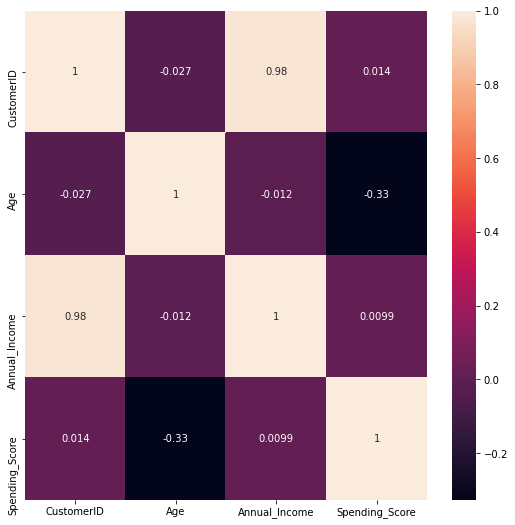

In [618]:
import seaborn as sns
plt.subplots(figsize=(9,9))
sns.heatmap(my_data.corr(),annot=True)

<h2 id="pre_processing">Pre-processing</h2


In [622]:
cf = my_data[['Gender', 'Age', 'Annual_Income', 'Spending_Score' ]].values
cf[0:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

In [623]:
from sklearn import preprocessing
le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['Male' , 'Female'])
cf[:,0] = le_Gender.transform(cf[:,0])

print(cf[0:5])

[[1 19 15 39]
 [1 21 15 81]
 [0 20 16 6]
 [0 23 16 77]
 [0 31 17 40]]


#### Normalizing:

In [624]:
from sklearn.preprocessing import StandardScaler
# X = X.values[:,1:]
X = np.nan_to_num(cf)
# Clus_dataSet = StandardScaler().fit_transform(X)


#### Plot features:

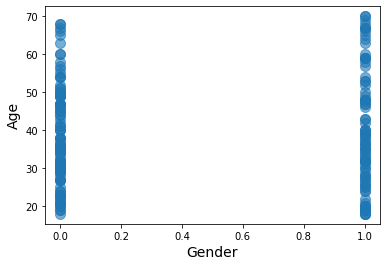

In [625]:
plt.scatter(X[:, 0], X[:, 1], s=100, alpha=0.6)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.show()

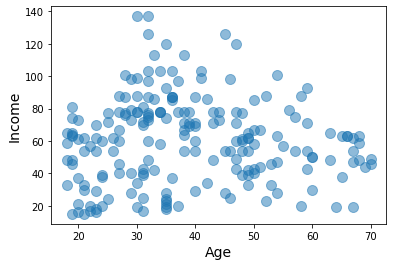

In [626]:
plt.scatter(X[:, 1], X[:, 2], s=100 , alpha=0.5)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Income', fontsize=14)

plt.show()

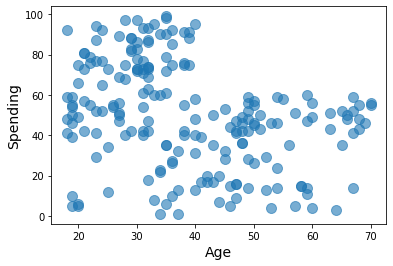

In [627]:
plt.scatter(X[:, 1], X[:, 3], s=100,  alpha=0.6)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending', fontsize=14)

plt.show()

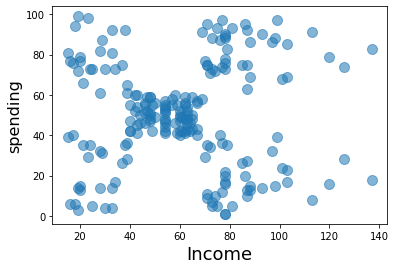

In [628]:
plt.scatter(X[:, 2], X[:, 3], s=100, alpha=0.55)
plt.xlabel('Income', fontsize=18)
plt.ylabel('spending', fontsize=16)

plt.show()

# K-Means Clustering

<h2 id="modeling">Modeling</h2>


In [637]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 15)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


<h2 id="insights">Insights</h2>

We assign the labels to each row in dataframe.


In [638]:
my_data["Clus"] = labels
my_data.head(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Clus
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


We can easily check the centroid values by averaging the features in each cluster.


In [639]:
my_data.groupby('Clus').mean()

,CustomerID,Age,Annual_Income,Spending_Score
Clus,,,,
0,162.000000,32.692308,86.538462,82.128205
1,86.265823,43.088608,55.291139,49.569620
2,163.500000,40.666667,87.750000,17.583333
3,23.000000,45.217391,26.304348,20.913043
4,24.000000,25.521739,26.304348,78.565217


Now, let's look at the distribution of customers based on their Spending_Score and income:


<ipython-input-641-93fbbd3c5efe>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 3], X[:, 2], s=100, c=labels.astype(np.float), alpha=0.6)


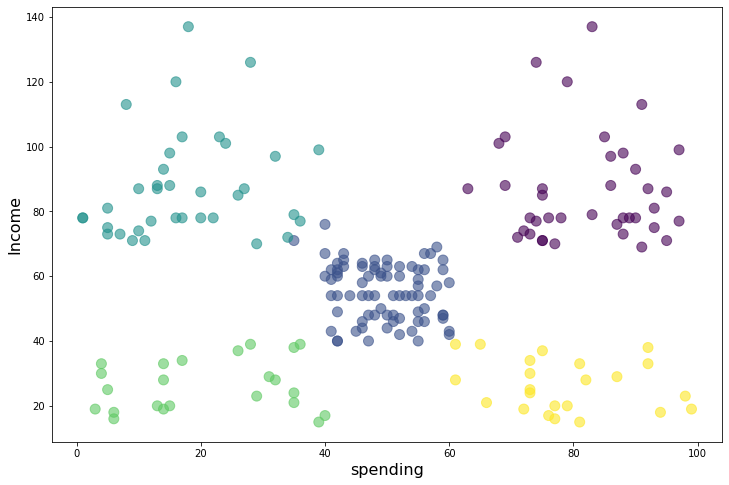

In [641]:
import pylab
fig = pylab.figure(figsize=(12,8))
area = ( X[:, 0])
plt.scatter(X[:, 3], X[:, 2], s=100, c=labels.astype(np.float), alpha=0.6)
plt.xlabel('spending', fontsize=16)
plt.ylabel('Income', fontsize=16)

plt.show()


<ipython-input-642-4e7f5f5cb253>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 0], X[:, 3], X[:, 2], c= labels.astype(np.float) , alpha=0.7)


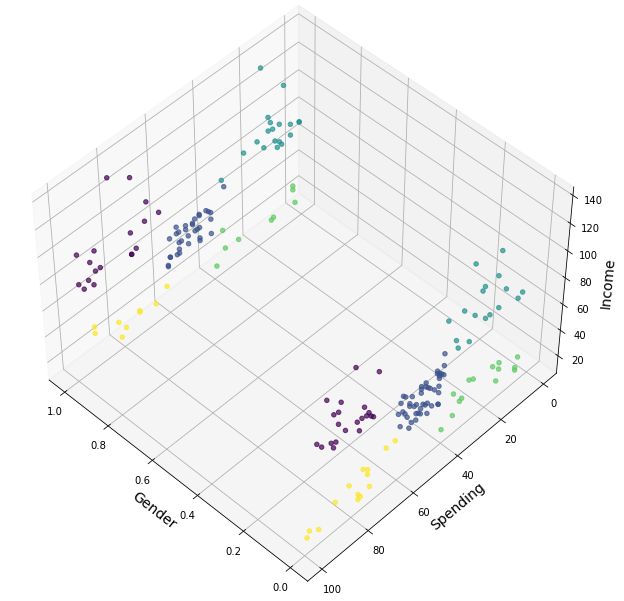

In [642]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Gender' , fontsize=14)
ax.set_ylabel('Spending' , fontsize=14)
ax.set_zlabel('Income' , fontsize=14)

ax.scatter(X[:, 0], X[:, 3], X[:, 2], c= labels.astype(np.float) , alpha=0.7)


<hr>

<div id=>
    <h2></h2>
    
</div>


# Hierarchical

<h3 id="Modeling_using_scipy">Modeling using Scipy</h3>

First, we calculate the distance matrix.

In [643]:
import scipy
leng = Clus_dataSet.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(X[i], X[j])

<ipython-input-643-668fc039f81d>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])



agglomerative clustering

In [644]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-644-8655000d21de>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


use a cutting line

In [645]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 48, 184,  45, 180,  49, 181,  46, 176,  47, 187,  43, 174,  44,
       182,  38, 183,  58, 188,  60, 175,  59, 191,  42, 192,  39, 189,
        56, 200,  57, 177,  40, 193,  41, 178,  54, 190,  55, 185,  50,
       186,  53, 179,  52, 197,  51, 199, 128,  63,  61,  62, 126, 198,
        64, 129,  67,  69, 127, 125,  65,  68, 121, 196, 123, 130, 118,
       194,  76, 124, 195,  66, 122,  73, 119, 120, 116,  77,  74,  75,
        78,  72, 117,  90, 113,  70,  79,  71, 107,  80,  91, 100, 114,
       136,  97,  95,  96,  86,  98,  87, 103,  84, 134,  99, 115,  88,
       106, 135, 108, 101, 111, 109, 110,  85,  93,  83,  81,  82, 112,
       104, 102, 105,  89,  94,  92, 172, 137, 149, 131, 173,  28, 144,
        26, 145, 138, 148,  35, 165,  27, 146,  36, 147,  29, 171, 139,
       166,  32, 162, 132, 140,  18, 169,  12, 167,  14, 142,  13, 170,
        33, 143,  34, 141, 133, 168,  37, 163,  15, 150,  16, 160,  17,
       153,  30, 151,  31, 161,  19, 164,  20, 152,  21, 158,  1

Also, you can determine the number of clusters directly:

In [646]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 2, 5, 2, 5,
       4, 5, 2, 5, 2, 5, 2, 5, 2, 5, 4, 5, 2, 5, 4, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 4, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

Now, plot the dendrogram:

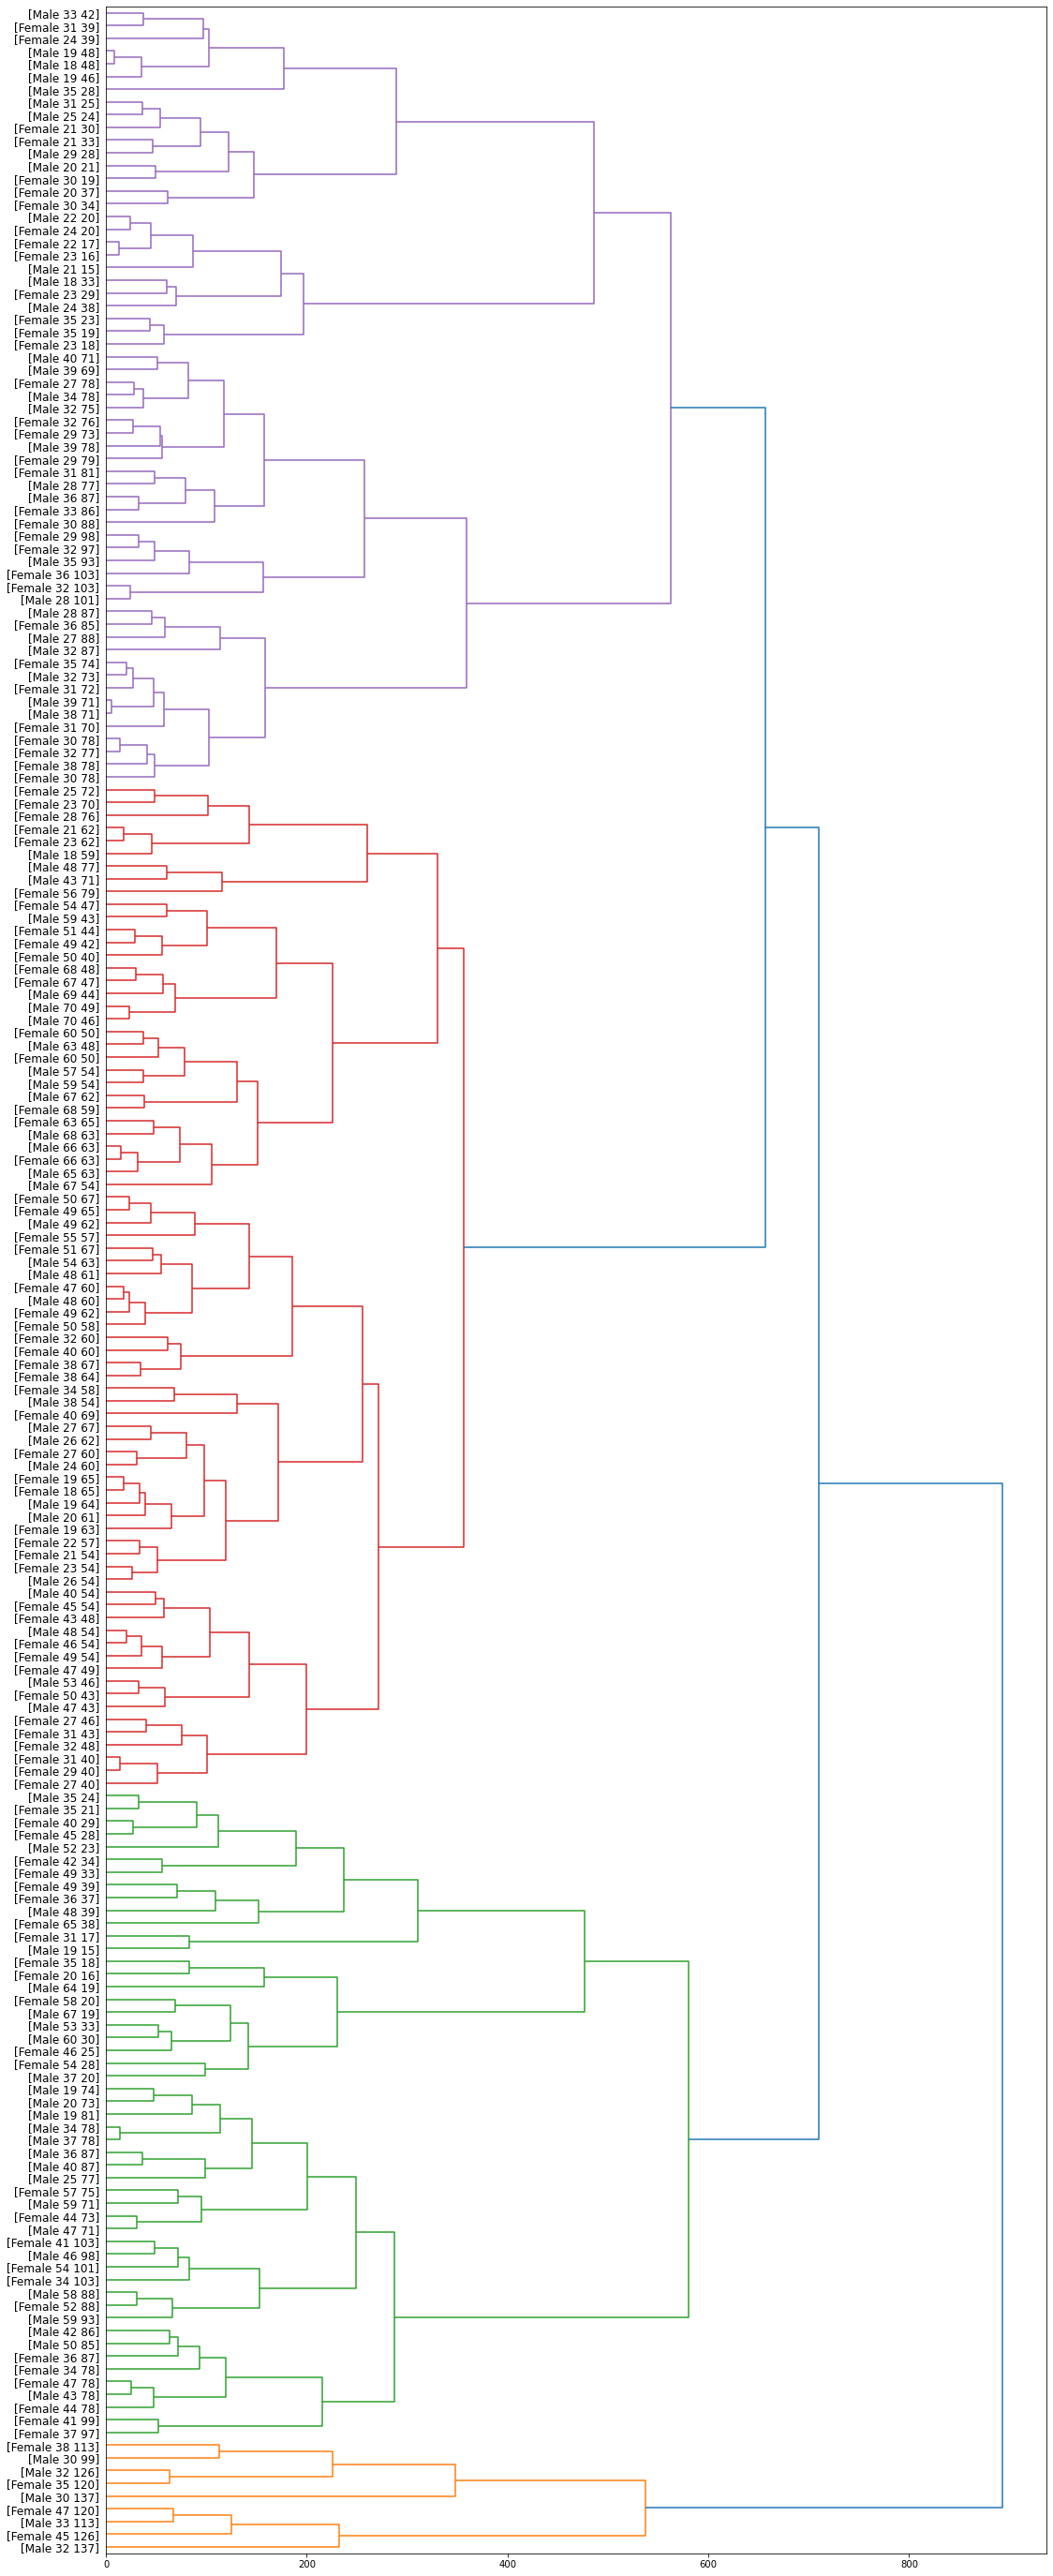

In [647]:

import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    # return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    return '[%s %s %s]' % (my_data['Gender'][id], my_data['Age'][id], int(float(my_data['Annual_Income'][id])) )
    
dendro = hierarchy.dendrogram(Z ,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<h3 id="modeling">Modeling using scikit-learn</h3>

In [648]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X,X) 
print(dist_matrix)

[[  0.          42.04759208  33.04542328 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01999733 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.04542328  75.01999733   0.         ... 129.8807145  122.18837915
  143.77412841]
 ...
 [117.1110584  111.7631424  129.8807145  ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18837915 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77412841 ...  14.35270009  65.03076195
    0.        ]]


In [649]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-649-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


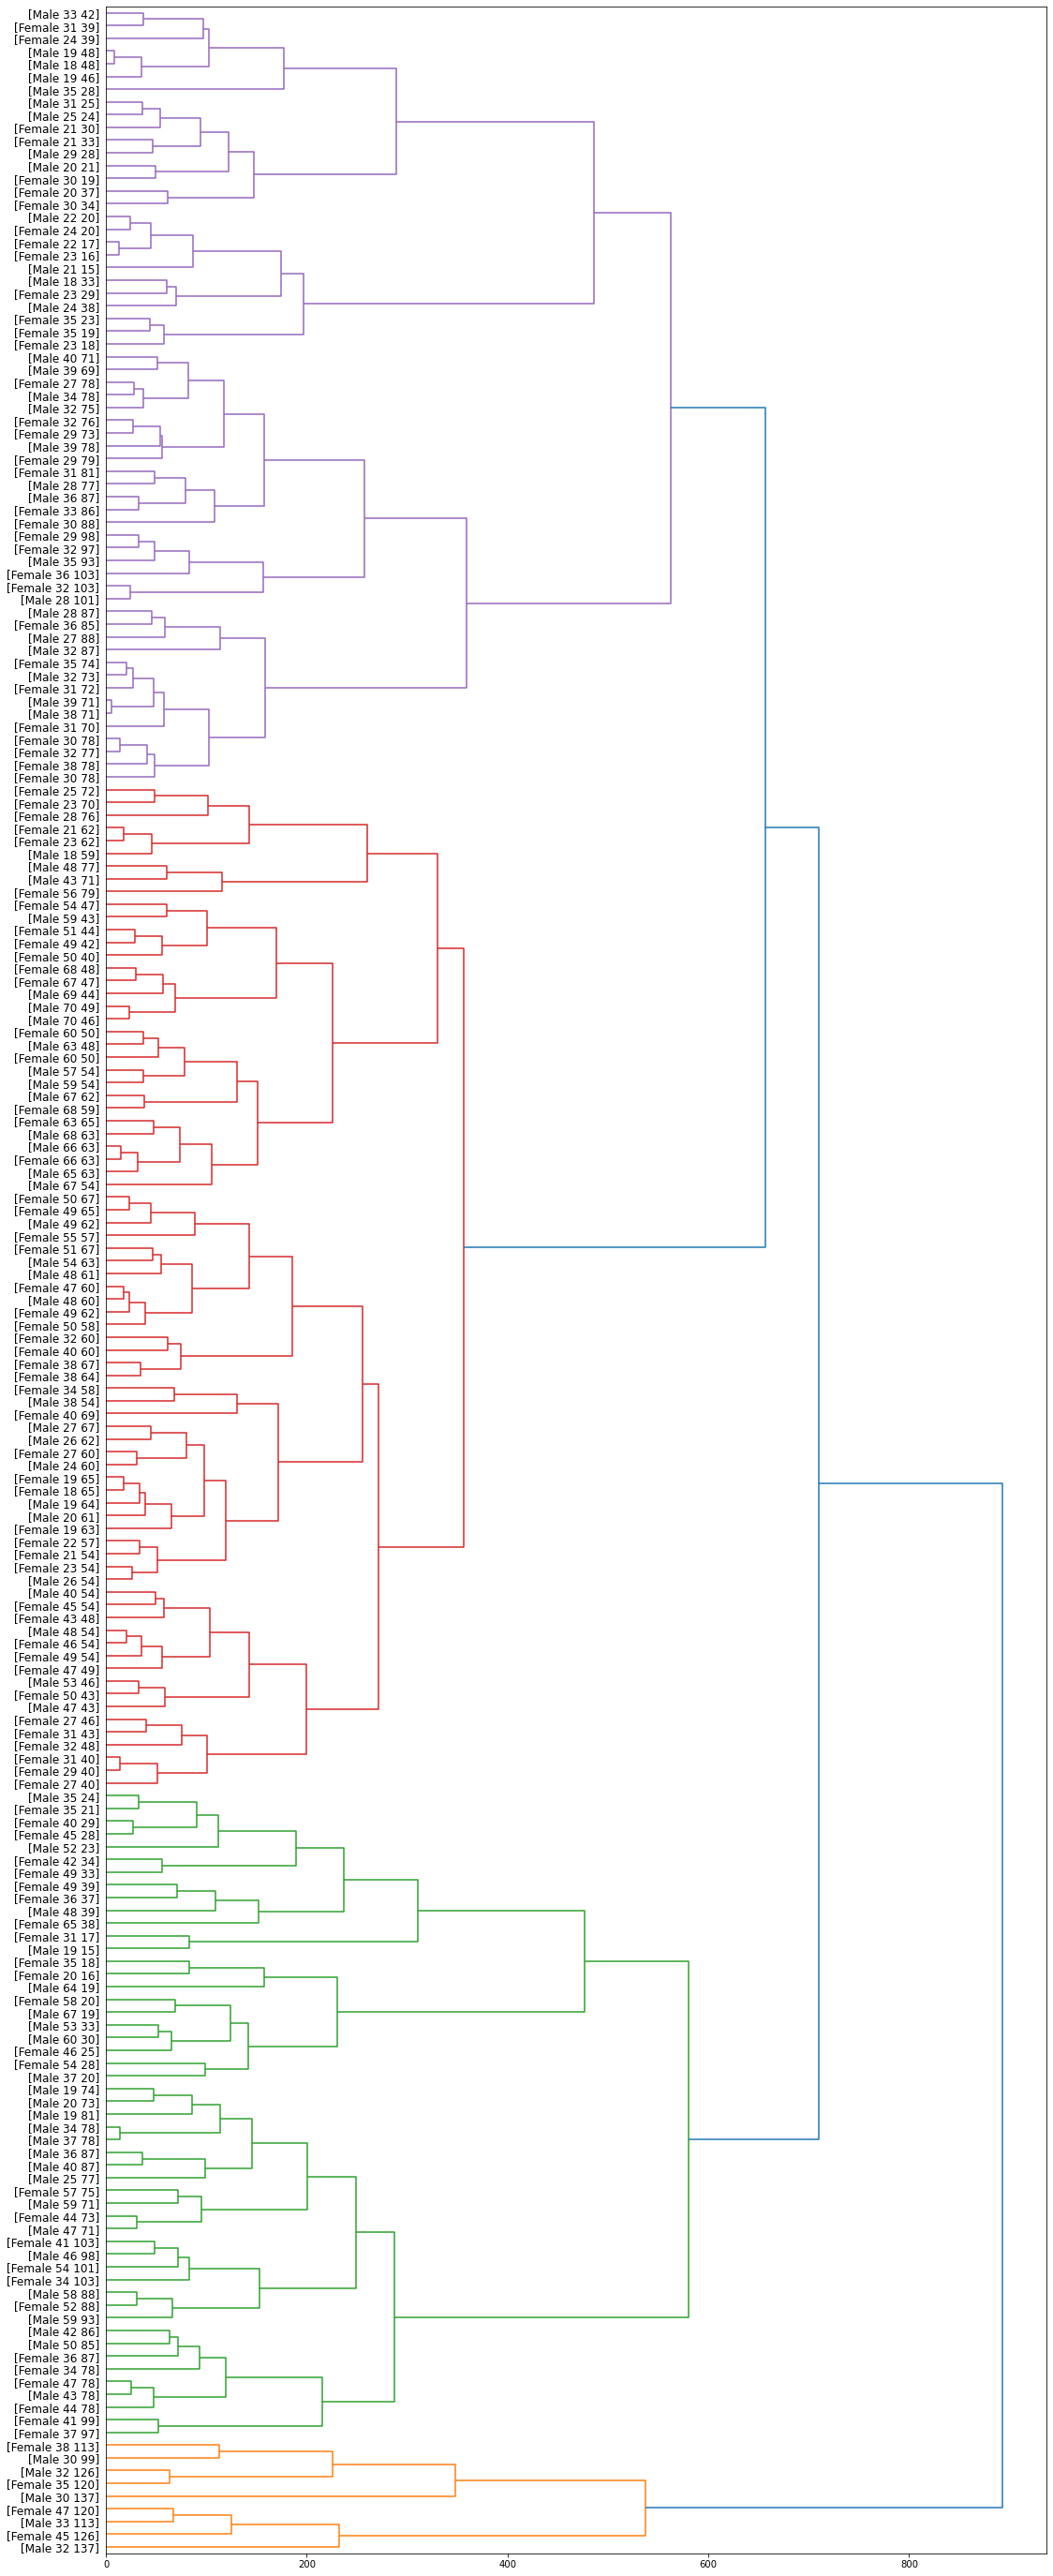

In [650]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    # return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    return '[%s %s %s]' % (my_data['Gender'][id], my_data['Age'][id], int(float(my_data['Annual_Income'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset

In [651]:
agglom = AgglomerativeClustering(n_clusters = 9, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 7, 8, 7, 2, 7, 8, 7, 8, 5, 8, 7, 8, 7, 8, 7, 2, 5, 2, 7, 2, 5,
       8, 5, 8, 5, 2, 5, 2, 7, 8, 5, 8, 7, 2, 5, 2, 5, 2, 5, 2, 7, 2, 5,
       2, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4, 0, 4, 0, 6, 3, 6, 3, 6, 3,
       6, 3], dtype=int64)

We can add a new field to our dataframe to show the cluster of each row:

In [653]:
my_data['cluster_'] = agglom.labels_
my_data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Clus,cluster_
0,1,Male,19,15,39,3,2
1,2,Male,21,15,81,4,7
2,3,Female,20,16,6,3,8
3,4,Female,23,16,77,4,7
4,5,Female,31,17,40,3,2


Run the following code to show the clustering! <br>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

[0.5 0.  1.  1. ] 0
[0.24901961 0.38410575 0.98063477 1.        ] 1
[0.00196078 0.70928131 0.92328911 1.        ] 2
[0.25294118 0.92563766 0.83018403 1.        ] 3
[0.50392157 0.99998103 0.70492555 1.        ] 4
[0.75490196 0.92090552 0.55236497 1.        ] 5
[1.         0.70054304 0.37841105 1.        ] 6
[1.         0.37270199 0.18980109 1.        ] 7
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00] 8


Text(0, 0.5, 'Incom')

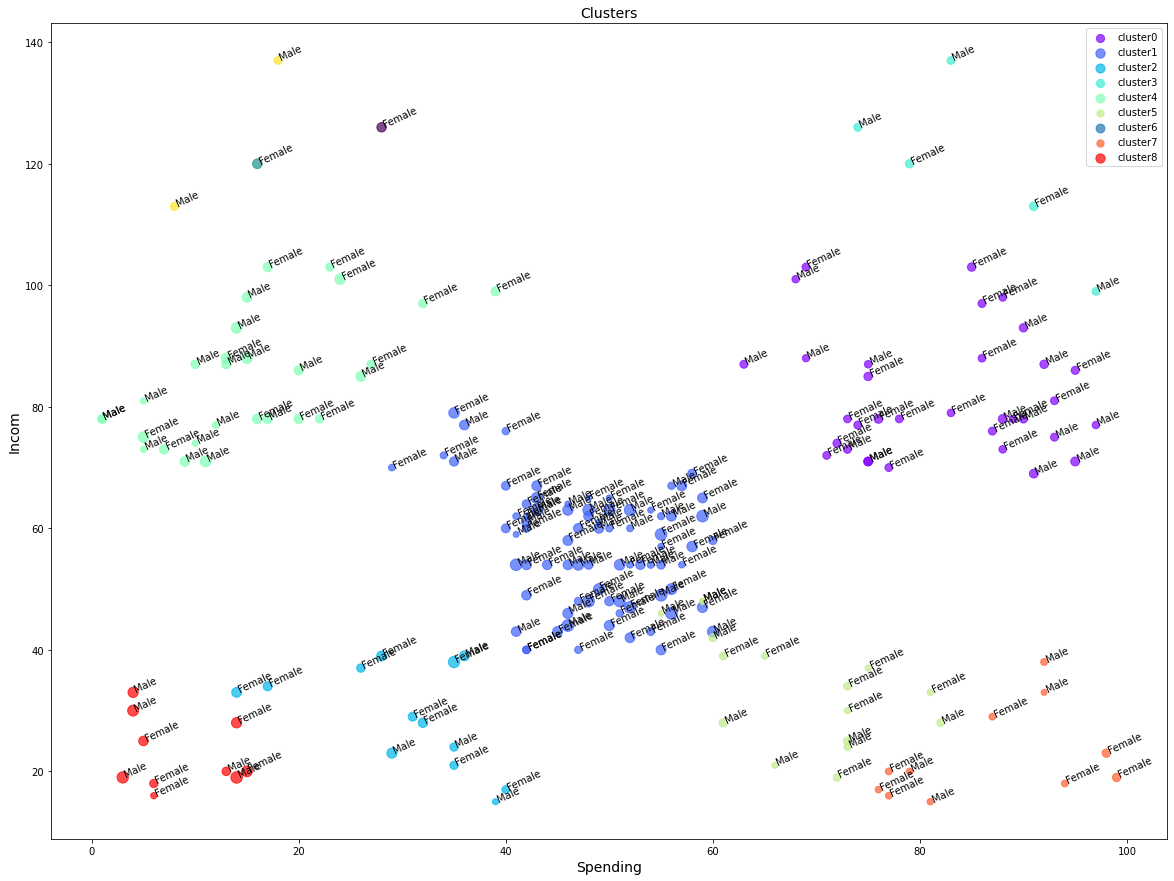

In [654]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(20,15))

for color, label in zip(colors, cluster_labels):
    print(color , label)
    subset = my_data[my_data.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Spending_Score[i], subset.Annual_Income[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Spending_Score, subset.Annual_Income, s= subset.Age*2, c=color, label='cluster'+str(label),alpha=0.7)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters' , fontsize=14)
plt.xlabel('Spending' , fontsize=14)
plt.ylabel('Incom' , fontsize=14)


As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster.
we count the number of cases in each group:

In [655]:
my_data.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         Female    19
          Male      15
1         Female    49
          Male      30
2         Female     9
          Male       4
3         Female     2
          Male       3
4         Female    12
          Male      16
5         Female     7
          Male       9
6         Female     2
          Male       2
7         Female     7
          Male       4
8         Female     5
          Male       5
Name: cluster_, dtype: int64

Now we can look at the characteristics of each cluster:

In [656]:
agg_Customer = my_data.groupby(['cluster_','Gender'])['Age', 'Annual_Income', 'Spending_Score'].mean()
agg_Customer

<ipython-input-656-5db78793b7f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_Customer = my_data.groupby(['cluster_','Gender'])['Age', 'Annual_Income', 'Spending_Score'].mean()


Age  Annual_Income  Spending_Score
cluster_ Gender                                          
0        Female  31.736842      82.842105       81.315789
         Male    33.800000      80.400000       82.266667
1        Female  41.040816      56.469388       48.061224
         Male    48.533333      57.166667       48.733333
2        Female  43.555556      30.666667       28.666667
         Male    38.500000      25.250000       34.750000
3        Female  36.500000     116.500000       85.000000
         Male    30.666667     120.666667       84.666667
4        Female  43.416667      88.333333       20.416667
         Male    39.625000      81.562500       11.500000
5        Female  25.285714      33.000000       71.428571
         Male    25.444444      34.444444       65.333333
6        Female  46.000000     123.000000       22.000000
         Male    32.500000     125.000000       13.000000
7        Female  26.428571      20.285714       86.857143
         Male    21.250000      26.500000       86.000000
8        Female  42.600000      21.400000        9.200000
         Male    56.200000      24.200000        7.600000

<hr>

<div id=>
    <h2></h2>
    
</div>


# DBSCAN

<h3 id="modeling">Modeling</h3>

In [657]:
epsilon = 15.2
minimumSamples = 6.2
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
# labels
np.histogram(labels)

(array([ 17,   0, 113,   0,   0,   9,   0,  34,   0,  27], dtype=int64),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ]))

### Distinguish outliers

In [658]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [659]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

In [660]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels


{-1, 0, 1, 2, 3}

### Data visualization

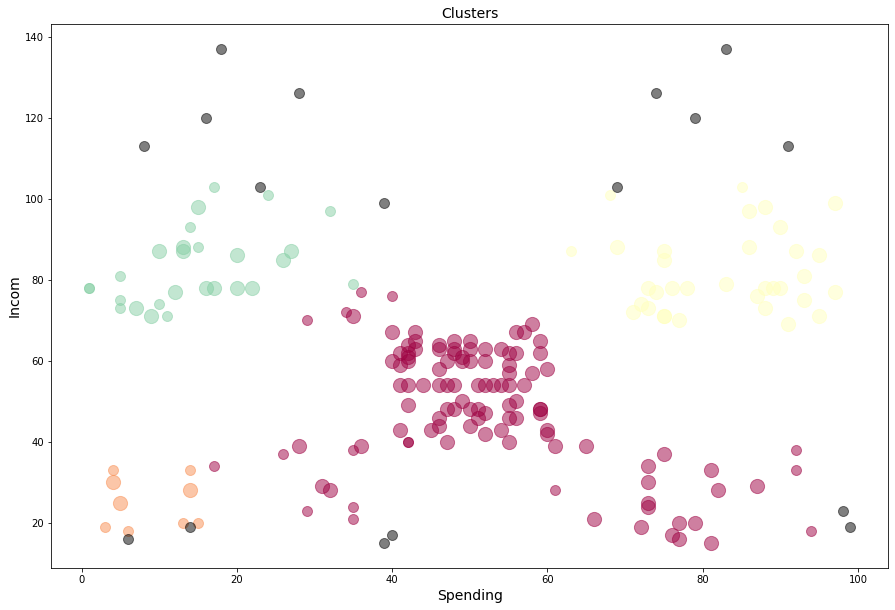

In [682]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
import pylab
fig = pylab.figure(figsize=(15,10))
# rcParams['figure.figsize'] = (14,10)

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 3], xy[:, 2] ,  s=200, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 3], xy[:, 2] , s=100, c=[col], marker=u'o', alpha=0.5)
    plt.title('Clusters', fontsize=14)
    plt.xlabel('Spending', fontsize=14)
    plt.ylabel('Incom', fontsize=14)